In [1]:
#Importing the MNIST digit dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

6


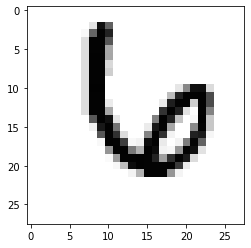

In [2]:
#Checking the contents of the dataset
import matplotlib.pyplot as plt
image_index = 44444   #Any number from 1 to 60,000
print(y_train[image_index]) # The label is 6
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
#Checking the shapes of x and y
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
#Converting the y arrays to a shape of [no. of images, no. of classes]
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [6]:
y_train.shape

(60000, 10)

In [7]:
# Reshaping the array to include the RGB value. Here RGB value is 1 since it is a b&w image
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# Converting the arrays to float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
# Normalizing the RGB codes by dividing it to the maximum RGB value.
x_train /= 255
x_test /= 255

In [10]:
#Checking the shapes of x_train and y_train 
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
Number of images in x_train 60000
Number of images in x_test 10000


In [11]:
#Initializing the input shape
input_shape = (28, 28, 1)

In [12]:
#Building the "Convolutional Neural Network" model

from tensorflow import keras

model = keras.Sequential([

keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.4),

keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.4),

keras.layers.Flatten(),
keras.layers.Dropout(0.4),
keras.layers.Dense(10, activation='softmax')

])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0

In [13]:
#Training the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x=x_train,y=y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3099 - accuracy: 0.9099
Epoch 2/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1030 - accuracy: 0.9725
Epoch 3/30
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0823 - accuracy: 0.9786
Epoch 4/30
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0678 - accuracy: 0.9819
Epoch 5/30
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0552 - accuracy: 0.9852
Epoch 6/30
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0529 - accuracy: 0.9859
Epoch 7/30
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0433 - accuracy: 0.9886
Epoch 8/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0408 - accuracy: 0.9890
Epoch 9/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0378 - accuracy: 0.9899
Epoch 10/30
1875/1875 [==============================] - 61s 33m

In [14]:
#Testing the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9944


[0.02517593465745449, 0.9944000244140625]

In [21]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'C:/Users/ZEUS/Desktop')